# Remote Data Access Using Pandas Datareader, WRDS API, <br/>BEA API, FRED API, US Census Bureau API, Intrinio API, and Xignite APIs

**Author**: Christian Jauregui<br/>
**Contact**: chris.jauregui@berkeley.edu

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import date, datetime, timedelta

import os 
import sys
from dotenv import load_dotenv # https://github.com/theskumar/python-dotenv

### dotenv loads (or re-loads) the .env file in your home directory.
%load_ext dotenv
%dotenv

### Check pandas version and import correct web reader
from distutils.version import StrictVersion
if StrictVersion(pd.__version__) >= StrictVersion('0.19'):
    import pandas_datareader.data as web
else:
    import pandas.io.data as web
    
### Matplotlib imports
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
import matplotlib.dates
from cycler import cycler

### Plot options
plt.style.use('ggplot')
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['lines.color'] = 'blue'
mpl.rcParams['axes.prop_cycle'] = cycler('color', ['#30a2da', '#e5ae38', '#fc4f30', '#6d904f', '#8b8b8b'])
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['axes.facecolor'] = '#f0f0f0'
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['axes.axisbelow'] = True
mpl.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['axes.labelpad'] = 0.0
mpl.rcParams['axes.xmargin'] = 0.05  # x margin.  See `axes.Axes.margins`
mpl.rcParams['axes.ymargin'] = 0.05  # y margin See `axes.Axes.margins`
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['figure.subplot.left'] = 0.08
mpl.rcParams['figure.subplot.right'] = 0.95
mpl.rcParams['figure.subplot.bottom'] = 0.07
mpl.rcParams['figure.figsize'] = (8.0, 6.0) # Make plots bigger

### this allows plots to appear directly in the notebook
%matplotlib inline    

### set display precision when using pandas dataframes
pd.set_option("display.precision", 3)

## Pandas Datareader:

The package `pandas-datareader`, which is a byproduct of the pandas library, is a great tool for reading data from the web:

In [2]:
### Check pandas version and import correct web reader
from distutils.version import StrictVersion
if StrictVersion(pd.__version__) >= StrictVersion('0.19'):
    import pandas_datareader.data as web
else:
    import pandas.io.data as web

In [3]:
dfyahoo_AAPL = web.get_data_yahoo('AAPL',
                                  start=date(1995,1,1), 
                                  end=date(2018,12,31))
dfyahoo_AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,1.388,1.353,1.388,1.371,2.597e+07,0.656
1995-01-04,1.415,1.379,1.379,1.406,3.967e+07,0.674
1995-01-05,1.406,1.384,1.402,1.388,1.841e+07,0.665
1995-01-06,1.540,1.469,1.487,1.500,2.692e+08,0.718
1995-01-09,1.496,1.464,1.487,1.472,6.852e+07,0.705


In [4]:
dfyahoo_AAPL.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,151.55,146.59,148.15,146.83,3.717e+07,146.203
2018-12-26,157.23,146.72,148.30,157.17,5.858e+07,156.499
2018-12-27,156.77,150.07,155.84,156.15,5.312e+07,155.483
2018-12-28,158.52,154.55,157.50,156.23,4.229e+07,155.563
2018-12-31,159.36,156.48,158.53,157.74,3.500e+07,157.066


Even though we were able to pull data directly from **Yahoo! Finance** using `pandas-datareader` for the period from 1/1/1995 to 12/31/2018, it is worth mentioning that the **Yahoo! Finance** reader has immediate deprecation according to the official `pandas-datareader` documentation (see https://pandas-datareader.readthedocs.io/en/latest/whatsnew.html).

A better alternative is to pull historical stock data using the **Quandl** data reader. First, each of you need to get a free **Quandl** API key, which will be unique to your **Quandl** account. To get one, follow the instructions in the [Quandl API Documentation](https://docs.quandl.com/). 

Your **Quandl** API key should be kept secret, safe, and secure (just like any login username and/or password). You do this by hiding this information using "environment variables." A simple way to do this is to store them in file called `.env`, which can then be sourced in `~/.bash_profile`. 

First, create file `.env` in your home directory (same directory where `~/.bash_profile` is located). Then, open `~/.bash_profile` and add the following: `source ~/.env`. In `.env`, you will add your API keys, usernames, and passwords as environment variables using the `export` command: `export QUANDL_API_KEY="KEY GOES HERE"`. 

Alternatively, you can just add the environment variables directly to `~/.bash_profile`. To do this, use this [tutorial](https://icollectwords.net/2017/05/01/twitter-api-key-token-environment-variables/) as a guide. However, if you want to add a new environment variable while your Jupyter session is open, you will have to close and re-open a new terminal session to register any updates to `~/.bash_profile`. Using the `.env` file allows you to source them directly using the package `python-dotenv` (installed using `pip install python-dotenv`). 

For example, the **Quandl** API key will be an environment variable which can be retrieved using the piece of code `os.getenv('QUANDL_API_KEY')` or `os.environ['QUANDL_API_KEY']`. If the environment variable does not exist, then the former returns a `KeyError` while the latter returns `None`.

There are other ways to store your API keys and private information as environment variables. If you prefer these other ways, use them and share them with your classmates! 

You will access environment variables (as well as anything in `/.bash_profile`). using the `os` package, which provides functions for interacting with the operating system. You will also need the `sys` package. You will load your environment variables using the following commands:

* <code><strong>import</strong> os</code>
* <code><strong>import</strong> sys</code>
* <code>%load_ext dotenv</code>
* <code>%dotenv</code>

If you update the `.env` file while a Jupyter session is open, you need to make sure you update the environment variables stored locally. You do this by running the command `source ~/.bash_profile` (so any future sessions use the updated `.env` file) and by adding the following to your Python code:
* <code>%reload_ext dotenv</code>
* <code>%dotenv</code>

After implementing the aforementioned procedures, you can pull **Quandl** stock data for free. A key parameter in the **Quandl** data reader is `symbol`, which consists of two parts: database name and symbol name. 

Database names can be any of the free ones listed on the [Quandl website](https://blog.quandl.com/free-data-on-quandl). Also, unlike the **Yahoo! Finance** reader, **Quandl** dates are reversed (i.e. dataframes created by the data reader have data in descending order by dates). For our purposes, historical Apple stock data is obtained as follows:

In [5]:
import os 
import sys
from dotenv import load_dotenv # https://github.com/theskumar/python-dotenv

### Reloads the .env file in your home directory.
%reload_ext dotenv
%dotenv

symbol = 'WIKI/AAPL'  # or 'AAPL.US'
dfquandl_AAPL = web.DataReader(symbol, 'quandl', start='1995-01-01', end='2018-12-31', 
                               access_key=os.environ['QUANDL_API_KEY'])
dfquandl_AAPL.index = pd.to_datetime(dfquandl_AAPL.index)
dfquandl_AAPL.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-27,173.68,175.15,166.92,168.340,3.896e+07,0.0,1.0,173.68,175.15,166.92,168.340,3.896e+07
2018-03-26,168.07,173.10,166.44,172.770,3.627e+07,0.0,1.0,168.07,173.10,166.44,172.770,3.627e+07
2018-03-23,168.39,169.92,164.94,164.940,4.025e+07,0.0,1.0,168.39,169.92,164.94,164.940,4.025e+07
2018-03-22,170.00,172.68,168.60,168.845,4.105e+07,0.0,1.0,170.00,172.68,168.60,168.845,4.105e+07
2018-03-21,175.04,175.09,171.26,171.270,3.525e+07,0.0,1.0,175.04,175.09,171.26,171.270,3.525e+07


The `pandas-datareader` package is an excellent tool allowing you to remotely access data from a large set of **free** online data sources. These data sources include: 
<ul>
    <li><strong>Yahoo! Finance</strong></li>
    <li><strong>Quandl</strong></li>
    <li><strong>Investors Exchange (IEX)</strong></li> 
    <li><strong>The St. Louis Fed (FRED)</strong></li>
    <li><strong>Tiingo</strong></li> 
    <li><strong>Fama-French Data</strong> (from Ken R. French's Data Library)</li>
    <li><strong>Alpha Vantage</strong> </li>    
</ul>

I already provided examples of how to access **Yahoo! Finance** and **Quandl** data. 

In addition, data from the **Wharton Research Data Services (WRDS)**, the **Bureau of Economic Analysis (BEA)**, the **US Census Bureau**, **Intrinio**, and **Xignite**, among others can be remotely accessed with Python. 

## WRDS API
Accessing and queying WRDS data is possible via two methods. First, we can use the [WRDS-Py](https://pypi.org/project/wrds/) library, which must be installed. Run `pip install wrds` in your terminal or `!pip install wrds` in Jupyter notebooks.

In case you already installed the **WRDS** library, type `pip list` in the terminal to check your latest installed version. Else, in the notebook type `help('modules')` or `!pip list`.

Second, we can manipulate some key functions that are part of the `WRDS-Py` package so that we can automate our log-in procedure. I will explain later in more detail.

Similar to **Quandl** data, **WRDS** and other data sources require either an API key or an account with a username and password. This information should not be exposed to the public. Store them as "environment variables." This can be done by adding them to your `~\.env` file which is sourced in `~\.bash_profile`. See **Lab 1A** for a review of this.

## BEA API
Accessing and querying **BEA** data is possible with the [pyBEA](https://pypi.org/project/pybea/) library, which must be installed (run `pip install pybea` in your terminal or `!pip install pybea` in the notebook). You can also access **BEA** data directly by making use of its API structure.

You will need an API key to access **BEA** data. Store it as an environment variable. 


## FRED API
To access data from the **St. Louis Fed (FRED)**, we can use `pandas-datareader`. Alternatively, we can make use of the Python package `fredapi`, which is a Python API for FRED that is separate from `pandas-datareader`. `fredapi` provides a wrapper in python to the FRED web service. It also provides several convenient methods for parsing and analyzing point-in-time data (i.e. historic data revisions) from the St. Louis Fed's Archival Economic Data (**ALFRED**)

You will need an API key to access **FRED** data through `fredapi` . Store it as an environment variable. 


## US Census Bureau API



## Intrinio API

**Intrinio**'s financial data marketplace contains both free and subscription data feeds for US publicly-traded companies. Data feeds range from equity research, analyst ratings, and executive compensation, to institutional and ETF holdings as well as insider transactions.

Free data is limited. To access **Intrinio**'s APIs, you need to create an account [here](https://account.intrinio.com/get-started/register). You will then have access to two API keys: a "Sandbox" key as well as a "Production" key. The difference is explained [here](https://about.intrinio.com/sandbox-vs-production). For our purposes, we will use the Sandbox API key.

You can submit API requests directly using the [online documentation](https://docs.intrinio.com/documentation/api_v2/get_company_news_v2?values=eyJpZGVudGlmaWVyIjoiQUFQTCIsInBhZ2Vfc2l6ZSI6bnVsbCwibmV4dF9wYWdlIjpudWxsfQ%3D%3D).

## Xignite API

**Xignite** provides a wide range of APIs (via 7-day trials and subscriptions) that give you access to both historical and on-demand data feeds for a wide range of asset classes, frequencies, and regions. In this tutorial I will explore its *U.S. and Global Fund Fundamental Data API* [(XigniteGlobalFundFundamentals)](https://www.xignite.com/product/global-fund-market-data/#/productoverview). 

To sign-up for a 7-day trial, go [here](https://market-data.xignite.com/Trial.html).

## Outline
First, I will provide examples of how to pull data using `pandas-datareader` for the data sources noted above. These examples draw heavily from the [Remote Data Access](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#fama-french) online documentation for `pandas-datareader` 0.7.0. 

Afterwards, I will describe how data from **WRDS**, the **BEA**, the **US Census Bureau**, **Intrinio**, and **Xignite** can be accessed and queried from your Jupyter notebook (or Python script). 

## Investors Exchange (IEX)
The example below shows how to pull data from **IEX** (see [online documentation](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-iex) for more details). **IEX** provides a wide range of data through an API. Though, historical stock price data is only available for up to 5 years.

In [6]:
start = dt.datetime(2015, 1, 1)
end = dt. datetime(2018, 12, 31)
dfiex_AAPL = web.DataReader('AAPL', 'iex', start, end)
dfiex_AAPL.head()

,open,high,low,close,volume
date,,,,,
2015-01-02,103.441,103.487,99.689,101.528,53204626
2015-01-05,100.562,100.897,97.888,98.668,64285491
2015-01-06,98.937,99.764,97.163,98.677,65797116
2015-01-07,99.550,100.479,99.081,100.061,40105934
2015-01-08,101.435,104.147,100.943,103.905,59364547


In [7]:
dfiex_AAPL.tail()

,open,high,low,close,volume
date,,,,,
2018-12-24,147.517,150.903,145.964,146.203,37169232
2018-12-26,147.667,156.559,146.093,156.499,58582544
2018-12-27,155.174,156.100,149.429,155.483,53117065
2018-12-28,156.827,157.843,153.890,155.563,42291424
2018-12-31,157.853,158.679,155.812,157.066,35003466


In [8]:
dfiex_AAPL.loc['2015-02-09']

open      1.105e+02
high      1.117e+02
low       1.104e+02
close     1.116e+02
volume    3.889e+07
Name: 2015-02-09, dtype: float64

## The St. Louis Fed (FRED)
The example below shows how to pull data from **FRED** (see [online documentation](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#fred) for more details). **FRED** provides a wide range of economic time series from over 80 sources! It is important we know the series ticker for a **FRED** series. For example, if we wanted to access the quarterly U.S. nominal gross domestic product series in **FRED** (series `GDP`) then the ticker is `GDP` (https://fred.stlouisfed.org/series/GDP). The real (i.e. deflated) series is given by ticker `GDPC1`.

In [9]:
start = dt.datetime(1995, 1, 1)
end = dt.datetime(2018, 12, 31)
ngdp = web.DataReader('GDP', 'fred', start, end)
ngdp.head()

,GDP
DATE,
1995-01-01,7522.289
1995-04-01,7580.997
1995-07-01,7683.125
1995-10-01,7772.586
1996-01-01,7868.468


In [10]:
rgdp = web.DataReader('GDPC1', 'fred', start, end)
rgdp.head()

,GDPC1
DATE,
1995-01-01,10543.644
1995-04-01,10575.100
1995-07-01,10665.060
1995-10-01,10737.478
1996-01-01,10817.896


To access real gdp growth (percent change from quarter one year ago, seasonally adjusted), then the ticker is `A191RO1Q156NBEA` (https://fred.stlouisfed.org/series/A191RO1Q156NBEA). 

In [11]:
rgdpg = web.DataReader('A191RO1Q156NBEA', 'fred', start, end)
rgdpg.rename(columns={'A191RO1Q156NBEA': 'rgdp_growth'}, inplace=True)
rgdpg.insert(rgdpg.columns.get_loc('rgdp_growth'), 'quarter_date', pd.PeriodIndex(pd.to_datetime(rgdpg.index), freq='Q'))
rgdpg.head()


,quarter_date,rgdp_growth
DATE,,
1995-01-01,1995Q1,3.5
1995-04-01,1995Q2,2.4
1995-07-01,1995Q3,2.7
1995-10-01,1995Q4,2.2
1996-01-01,1996Q1,2.6


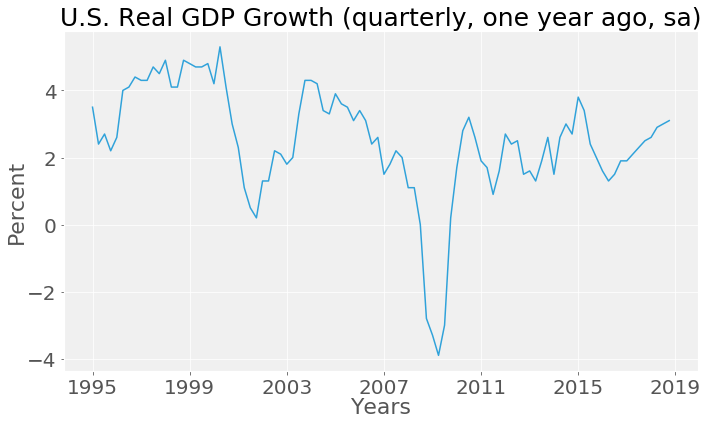

In [12]:
### Plot the time series
mpl.rcParams['figure.figsize'] = (10.0, 6.0) # Make plots bigger
plt.xlabel('Years', fontsize=22)
plt.ylabel('Percent', fontsize=22)
plt.title('U.S. Real GDP Growth (quarterly, one year ago, sa)', fontsize=25)
plt.plot(rgdpg.rgdp_growth)
plt.tight_layout()

## Tiingo
The example below shows how to pull data from **Tiingo** (see [online documentation](https://pydata.github.io/pandas-datareader/devel/remote_data.html#remote-data-tiingo) for more details). **Tiingo** provides free historical end-of-day prices on equities, mutual funds and ETFs. You do need an API key to access the data. Access to the data is rate limited and you are only allowed a limited number of symbols (500 as of 2018).

In [13]:
start = dt.datetime(1995, 1, 1)
end = dt.datetime(2018, 12, 31)
dftiingo_GOOG = web.get_data_tiingo('GOOG', 
                                    start=start, 
                                    end=end, 
                                    api_key=os.environ['TIINGO_API_KEY'])
dftiingo_GOOG.head() 

adjClose  adjHigh  adjLow  adjOpen  adjVolume   close  \
symbol date                                                                
GOOG   2014-03-27    558.46   568.00  552.92  568.000      13100  558.46   
       2014-03-28    559.99   566.43  558.67  561.200      41100  559.99   
       2014-03-31    556.97   567.00  556.93  566.890      10800  556.97   
       2014-04-01    567.16   568.45  558.71  558.710       7900  567.16   
       2014-04-02    567.00   604.83  562.19  565.106     146700  567.00   

                   divCash    high     low     open  splitFactor  volume  
symbol date                                                               
GOOG   2014-03-27      0.0  568.00  552.92  568.000          1.0   13100  
       2014-03-28      0.0  566.43  558.67  561.200          1.0   41100  
       2014-03-31      0.0  567.00  556.93  566.890          1.0   10800  
       2014-04-01      0.0  568.45  558.71  558.710          1.0    7900  
       2014-04-02      0.0  604.83  562.19  565.106          1.0  146700

In [14]:
dftiingo_GOOG.tail() 

adjClose  adjHigh   adjLow  adjOpen  adjVolume    close  \
symbol date                                                                  
GOOG   2018-12-24    976.22  1003.54   970.11   973.90    1590328   976.22   
       2018-12-26   1039.46  1040.00   983.00   989.01    2373270  1039.46   
       2018-12-27   1043.88  1043.89   997.00  1017.15    2109777  1043.88   
       2018-12-28   1037.08  1055.56  1033.10  1049.62    1413772  1037.08   
       2018-12-31   1035.61  1052.70  1023.59  1050.96    1493722  1035.61   

                   divCash     high      low     open  splitFactor   volume  
symbol date                                                                  
GOOG   2018-12-24      0.0  1003.54   970.11   973.90          1.0  1590328  
       2018-12-26      0.0  1040.00   983.00   989.01          1.0  2373270  
       2018-12-27      0.0  1043.89   997.00  1017.15          1.0  2109777  
       2018-12-28      0.0  1055.56  1033.10  1049.62          1.0  1413772  
       2018-12-31      0.0  1052.70  1023.59  1050.96          1.0  1493722

## Fama French Data (Ken French Data Library)
The example below shows how to pull **Fama French** data from French's Online Data Library using pandas (see [online documentation](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-ff)). Data can only be pulled from 2010 onwards **when you don't pass the start and end dates**. Else, you can pull for any range of dates so long as you pass them as `datetime` objects. There are over 250 datasets that can be pulled using this data reader. The datasets vary across frequency, factors, and portfolios. 

To get a list of all available datasets, we use the function `get_available_datasets`:

In [15]:
from pandas_datareader.famafrench import get_available_datasets
get_available_datasets() 

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portfolios_ME_OP_5x5_Wout_Div',
 '25_Portfolios_ME_OP_5x5_daily',
 '100_Po

In [16]:
### Can also use: web.get_data_famafrench('5_Industry_Portfolios')
df_ff5ind = web.DataReader('5_Industry_Portfolios', 'famafrench') 
print("Original datatype:", type(df_ff5ind), "\n") 
print(df_ff5ind['DESCR'])

### Using web.DataReader or web.get_data_famafrench results in a dictionary, not a dataframe. 
### This results from the various "datasets" associated with '5_Industry_Portfolios' that are pulled at once. 
print(type(df_ff5ind)) 

Original datatype: <class 'dict'> 

5 Industry Portfolios
---------------------

This file was created by CMPT_IND_RETS using the 201901 CRSP database. It contains value- and equal-weighted returns for 5 industry portfolios. The portfolios are constructed at the end of June. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2019 Kenneth R. French

  0 : Average Value Weighted Returns -- Monthly (109 rows x 5 cols)
  1 : Average Equal Weighted Returns -- Monthly (109 rows x 5 cols)
  2 : Average Value Weighted Returns -- Annual (9 rows x 5 cols)
  3 : Average Equal Weighted Returns -- Annual (9 rows x 5 cols)
  4 : Number of Firms in Portfolios (109 rows x 5 cols)
  5 : Average Firm Size (109 rows x 5 cols)
  6 : Sum of BE / Sum of ME (9 rows x 5 cols)
  7 : Value-Weighted Average of BE/ME (9 rows x 5 cols)
<class 'dict'>


In [17]:
df_ff5ind[0].head() # 0: Average Value Weighted Returns -- Monthly

,Cnsmr,Manuf,HiTec,Hlth,Other
Date,,,,,
2010-01,-1.98,-4.02,-7.63,0.00,-1.65
2010-02,3.86,3.23,4.37,0.38,3.38
2010-03,6.33,4.74,6.92,3.61,8.43
2010-04,1.53,3.31,2.50,-2.22,2.15
2010-05,-5.71,-8.88,-7.31,-8.01,-8.82


In [18]:
df_ff5ind[2].head() # 0: Average Value Weighted Returns -- Annual

,Cnsmr,Manuf,HiTec,Hlth,Other
Date,,,,,
2010,21.59,20.65,16.84,4.70,16.04
2011,9.04,3.81,0.33,10.89,-9.83
2012,16.25,8.70,16.68,20.39,22.03
2013,32.98,29.09,33.99,41.42,41.08
2014,12.71,2.80,14.57,24.49,12.22


## Digression: Pulling Fama French Data *directly* from the Ken French Data Library
If we want to pull **Fama French** data from before 2010 using `pandas-datareader`, **you need to pass the start and end dates**. For example, you need to run the following:
* `df_ff5ind = web.DataReader('5_Industry_Portfolios', 'famafrench', start=dt.datetime(1995, 1, 1), end=dt.datetime(2018, 12, 31))`

If we wanted to pull data directly from Ken French's website, we can pull data directly using code that is a bit more involved. Can you think of a way to write a function that pulls factor data directly from French's website?

**Hint** Use the following imports:
<ul>
   <li><code><strong>from</strong> io <strong>import</strong> BytesIO</code></li>
   <li><code><strong>from</strong> zipfile <strong>import</strong> ZipFile</code></li>
   <li><code><strong>from</strong> urllib.request <strong>import</strong> urlopen</code></li>
</ui>        

In [19]:
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

### To get list of available datasets, we can go French's website and look for the filename 
### or we can use the "get_available_datasets()" function from earlier.
get_available_datasets() 


def get_data_famafrench_directly(library, frequency, library_type='factors'):
    if frequency in ['daily','weekly']:
        ff_filename = library + "_" + frequency 
        urllink = "http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/" + ff_filename + "_CSV.zip"              
    else:
        from pandas.tseries.offsets import MonthEnd # so we can use MonthEnd(0) for "monthly" data
        ff_filename = library 
        urllink = "http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/" + ff_filename + "_CSV.zip"
    
    url = urlopen(urllink)
    
    ### Download Zipfile and create pandas DataFrame
    zipfile = ZipFile(BytesIO(url.read()))
    FFdata = pd.read_csv(zipfile.open(ff_filename + ".CSV"), header = 0, skiprows=3)  
    FFdata.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
    
    ### get 1st row nummber that has all the values to be NaN:
    ### this coincides with annual data, which we don't want right now.
    first_row_with_all_NaN = FFdata.index[FFdata['Mkt-RF'].isna()].item()
    FFdata = FFdata[:first_row_with_all_NaN]
    
    ## convert monthly dates to end-of-month dates.
    if frequency=='monthly':
        FFdata['Date'] = pd.to_datetime(FFdata['Date'], format='%Y%m') + MonthEnd(0) 
    else:    
        FFdata['Date'] = pd.to_datetime(FFdata['Date'], format='%Y%m') 
        
    url.close()
    return FFdata

In [20]:
### test the function
library = 'F-F_Research_Data_5_Factors_2x3'
frequency = 'monthly'
df_famafrench = get_data_famafrench_directly(library, frequency) 
df_famafrench.head()

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF
0,1963-07-31,-0.39,-0.47,-0.83,0.66,-1.15,0.27
1,1963-08-31,5.07,-0.79,1.67,0.39,-0.40,0.25
2,1963-09-30,-1.57,-0.48,0.18,-0.76,0.24,0.27
3,1963-10-31,2.53,-1.29,-0.10,2.75,-2.24,0.29
4,1963-11-30,-0.85,-0.84,1.71,-0.45,2.22,0.27


In [21]:
df_famafrench.tail()

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF
662,2018-09-30,0.06,-2.53,-1.34,0.63,1.19,0.15
663,2018-10-31,-7.68,-4.43,3.41,0.74,3.49,0.19
664,2018-11-30,1.69,-0.77,0.19,-0.64,0.37,0.18
665,2018-12-31,-9.55,-3.02,-1.51,-0.23,0.13,0.19
666,2019-01-31,8.41,3.09,-0.60,-0.66,-1.47,0.21


Instead of using `urllib` we can the package `urllib3` which is an improved version of the `urllib` module. This module allows us to keep track of necessary connection pools using `urllib3.PoolManager()`. 

Below I modifiy the aformentioned function `get_data_famafrench_directly` by using `urllib3`.

In [22]:
import urllib3
from io import BytesIO
from zipfile import ZipFile

### To get list of available datasets, we can go French's website and look for the filename 
### or we can use the "get_available_datasets()" function from earlier.
get_available_datasets() 

http = urllib3.PoolManager()
def get_data_famafrench_directly3(library, frequency, library_type='factors'):
    if frequency in ['daily','weekly']:
        ff_filename = library + "_" + frequency 
        urllink = "http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/" + ff_filename + "_CSV.zip"       
    else:
        from pandas.tseries.offsets import MonthEnd # so we can use MonthEnd(0) for "monthly" data
        ff_filename = library 
        urllink = "http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/" + ff_filename + "_CSV.zip"
    
    url3 = http.request("GET", urllink)
    url3.status
    
    ### Download Zipfile and create pandas DataFrame
    zipfile = ZipFile(BytesIO(url3.data))
    FFdata = pd.read_csv(zipfile.open(ff_filename + ".CSV"), header = 0, skiprows=3)  
    FFdata.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
    
    ### get 1st row nummber that has all the values to be NaN:
    ### this coincides with annual data, which we don't want right now.
    first_row_with_all_NaN = FFdata.index[FFdata['Mkt-RF'].isna()].item()
    FFdata = FFdata[:first_row_with_all_NaN]
    
    ## convert monthly dates to end-of-month dates.
    if frequency=='monthly':
        FFdata['Date'] = pd.to_datetime(FFdata['Date'], format='%Y%m') + MonthEnd(0) 
    else:    
        FFdata['Date'] = pd.to_datetime(FFdata['Date'], format='%Y%m') 
        
    url3.close()
    return FFdata

In [23]:
df_famafrench3 = get_data_famafrench_directly3(library, frequency) 
df_famafrench3.head()

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF
0,1963-07-31,-0.39,-0.47,-0.83,0.66,-1.15,0.27
1,1963-08-31,5.07,-0.79,1.67,0.39,-0.40,0.25
2,1963-09-30,-1.57,-0.48,0.18,-0.76,0.24,0.27
3,1963-10-31,2.53,-1.29,-0.10,2.75,-2.24,0.29
4,1963-11-30,-0.85,-0.84,1.71,-0.45,2.22,0.27


In [24]:
df_famafrench3.tail()

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF
662,2018-09-30,0.06,-2.53,-1.34,0.63,1.19,0.15
663,2018-10-31,-7.68,-4.43,3.41,0.74,3.49,0.19
664,2018-11-30,1.69,-0.77,0.19,-0.64,0.37,0.18
665,2018-12-31,-9.55,-3.02,-1.51,-0.23,0.13,0.19
666,2019-01-31,8.41,3.09,-0.60,-0.66,-1.47,0.21


## Alpha Vantage 
[Alpha Vantage](https://www.alphavantage.co/documentation/) consists of APIs grouped into six categories: **(1)** stock price times series, **(2)** stock quotes, **(3)** exchange rates, **(4)** cryptocurrencies (i.e. digital currencies), **(5)** technical indicators, and **(6)** sector performances. 

Accessing and querying most **Alpha Vintage**  data is possible with the [Alpha Vantage API wrapper](https://github.com/RomelTorres/alpha_vantage), which must be installed (run `pip install alpha_vantage` in your terminal or `!pip install alpha_vantage` in the notebook). You can also obtain some data using `pandas-datareader`. Though, to access all available data, you need to make direct use of the APIs using the examples provided [here](https://www.alphavantage.co/documentation/). I provide examples for how to use the direct method for exchange rates, cryptos, and technical indicators.

To obtain a free **Alpha Vantage** API key you need to [go here](https://www.alphavantage.co/support/#api-key). To retrieve data from one of the six categories, you can follow the examples below. 

### Example 1: Stock Price Time Series - Historical Daily
Using `pandas-datareader`, the following frequencies are available for historical stock time series data (see [online documentation](https://pydata.github.io/pandas-datareader/devel/remote_data.html#alpha-vantage)):
<ul>
    <li><code>av-daily</code>: <strong>daily</strong></li> 
    <li><code>av-daily-adjusted</code>: <strong>daily (+ daily adjusted close, split/dividend events)</strong></li>
    <li><code>av-weekly</code>: <strong>weekly</strong></li>
    <li><code>av-daily-adjusted</code>: <strong>weekly (+ weekly adjusted close, weekly dividend)</strong></li>
    <li><code>av-monthly</code>: <strong>monthly</strong></li>
    <li><code>av-monthly-adjusted</code>: <strong>monthly (+ monthly adjusted close, monthly dividend)</strong></li>   
</ul>

In [25]:
import os
import sys
from dotenv import load_dotenv # https://github.com/theskumar/python-dotenv

### Reloads the .env file in your home directory.
%reload_ext dotenv
%dotenv

start = dt.datetime(2015, 1, 1)
end = dt. datetime(2018, 12, 31)
### Can also use "get_data_alphavantage"
dfav_AAPLts = web.DataReader("AAPL", "av-daily", 
                             start, 
                             end, 
                             access_key=os.getenv('ALPHAVANTAGE_API_KEY'))
dfav_AAPLts.insert(0, 'date', pd.to_datetime(dfav_AAPLts.index))

dfav_AAPLts.head()

,date,open,high,low,close,volume
2015-01-02,2015-01-02,111.39,111.44,107.350,109.33,53204626
2015-01-05,2015-01-05,108.29,108.65,105.410,106.25,64285491
2015-01-06,2015-01-06,106.54,107.43,104.630,106.26,65797116
2015-01-07,2015-01-07,107.20,108.20,106.695,107.75,40105934
2015-01-08,2015-01-08,109.23,112.15,108.700,111.89,59364547


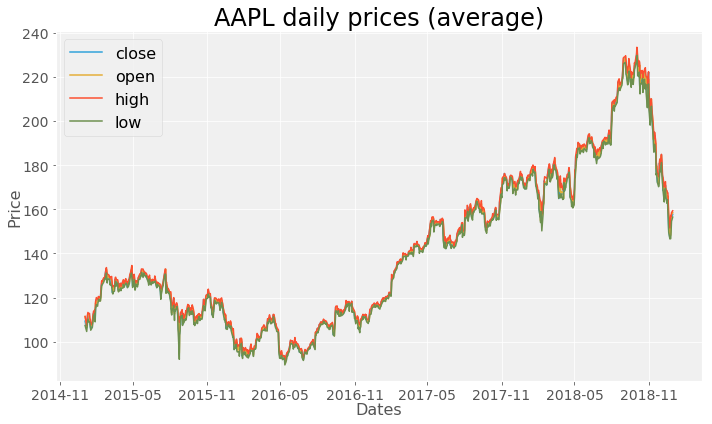

In [26]:
### Plot the time series
plt.xlabel('Dates', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.title('AAPL daily prices (average)', fontsize=24)
plt.plot(dfav_AAPLts.date, dfav_AAPLts['close'], label='close')
plt.plot(dfav_AAPLts.date, dfav_AAPLts['open'], label='open')
plt.plot(dfav_AAPLts.date, dfav_AAPLts['high'], label='high')
plt.plot(dfav_AAPLts.date, dfav_AAPLts['low'], label='low')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(loc='upper left', fontsize=16)
plt.tight_layout()

Now, lets try out the `alpha_vantage` library:

In [27]:
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key=os.getenv('ALPHAVANTAGE_API_KEY'),
                output_format='pandas', 
                indexing_type='date')
dfav_AAPLts_v2, meta_data = ts.get_daily(symbol='AAPL', outputsize='full')
dfav_AAPLts_v2 = dfav_AAPLts_v2['2015-01-01':'2018-12-31']
dfav_AAPLts_v2.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2015-01-02,111.39,111.44,107.350,109.33,5.320e+07
2015-01-05,108.29,108.65,105.410,106.25,6.429e+07
2015-01-06,106.54,107.43,104.630,106.26,6.580e+07
2015-01-07,107.20,108.20,106.695,107.75,4.011e+07
2015-01-08,109.23,112.15,108.700,111.89,5.936e+07


### Example 2: Stock Quotes - Realtime
Using the top-level function `get_quote_av`, we can retrieve realtime stock quotes for up to 100 symbols at a time. These quotes will mostly be available during trading hours. This function doesn't require our API key.

In [28]:
import sys
from dotenv import load_dotenv # https://github.com/theskumar/python-dotenv

### Reloads the .env file in your home directory.
%reload_ext dotenv
%dotenv

dfav_q = web.get_quote_av(["AAPL", "TSLA"])
dfav_q.head()

,price,volume,timestamp
symbol,,,
AAPL,188.77,43729043,2019-03-25 16:58:56
TSLA,260.58,9999892,2019-03-25 16:00:00


### Example 3: Forex and Cryptocurrencies - Realtime

When using `pandas-datareader` to pull realtime forex and digitial currencies, use the format "FROM/TO" as in "USD/JPY"

In [29]:
dfav_usdjpy = web.DataReader("USD/JPY", "av-forex", 
                             access_key=os.getenv('ALPHAVANTAGE_API_KEY'))
dfav_usdjpy.head()

,USD/JPY
From_Currency Code,USD
From_Currency Name,United States Dollar
To_Currency Code,JPY
To_Currency Name,Japanese Yen
Exchange Rate,110.04200000


### Example 4: Forex and Cryptocurrencies - Daily

We can access and request daily forex data using the `requests` package. The required parameters are described in the API documentation. Output will be in JSON format, which stands for *JavaScript Object Notation* and is a very flexible open-standard file format (much more flexible than `.csv` files!)

In [30]:
import requests # https://stackabuse.com/the-python-requests-module/
                # http://docs.python-requests.org/en/master/api/

api_key = os.getenv('ALPHAVANTAGE_API_KEY')
base='https://www.alphavantage.co/query?'
function='FX_DAILY' ### daily forex (EUR/USD)
from_symbol='EUR' 
to_symbol='USD'
url='{}&function={}&from_symbol={}&to_symbol={}&apikey={}&datatype=json'.format(base,function,from_symbol,to_symbol,api_key)

### METHOD 1 for pulling requests from an API - doesn't use a dictionary
data = requests.get(url).json() # use the built-in JSON decoder.
dfav_eurusd = pd.DataFrame(data['Time Series FX (Daily)']).T
dfav_eurusd = dfav_eurusd.rename(columns={'1. open': 'Open', 
                                          '2. high': 'High', 
                                          '3. low': 'Low', 
                                          '4. close': 'Close'})
dfav_eurusd.index = pd.to_datetime(dfav_eurusd.index)
dfav_eurusd.sort_index(inplace=True)
dfav_eurusd = dfav_eurusd[[ 'Open', 'High', 'Low', 'Close']]
dfav_eurusd.head()

,Open,High,Low,Close
2018-12-02,1.1346,1.1367,1.1330,1.1332
2018-12-03,1.1332,1.1380,1.1318,1.1354
2018-12-04,1.1354,1.1419,1.1317,1.1341
2018-12-05,1.1340,1.1361,1.1310,1.1347
2018-12-06,1.1348,1.1413,1.1320,1.1377


In [31]:
dfav_eurusd.tail()

,Open,High,Low,Close
2019-03-21,1.1421,1.1437,1.1341,1.1375
2019-03-22,1.1377,1.1391,1.1272,1.1300
2019-03-24,1.1284,1.1301,1.1282,1.1295
2019-03-25,1.1295,1.1332,1.1288,1.1314
2019-03-26,1.1321,1.1326,1.1307,1.1315


In [54]:
import requests

#### daily crypto (BTC - Bitcoin)
params_fields = {"function": 'DIGITAL_CURRENCY_DAILY',
                 "symbol": 'BTC', 
                 "market": 'USD',
                 "apikey": os.getenv('ALPHAVANTAGE_API_KEY')}
 
### METHOD 2 for pulling requests from an API - uses a dictionary    
data = requests.get('https://www.alphavantage.co/query', params=params_fields).json() # use the built-in JSON decoder.
dfav_btc = pd.DataFrame(data['Time Series (Digital Currency Daily)']).T
dfav_btc = dfav_btc.rename(columns={'1a. open (USD)': 'Open (USD)', 
                                    '2a. high (USD)': 'High (USD)', 
                                    '3a. low (USD)': 'Low (USD)', 
                                    '4a. close (USD)': 'Close (USD)', 
                                    '5. volume': 'Volume'})
dfav_btc.index = pd.to_datetime(dfav_btc.index)
dfav_btc.sort_index(inplace=True)
dfav_btc = dfav_btc[[ 'Open (USD)', 'High (USD)', 'Low (USD)', 'Close (USD)', 'Volume']]
dfav_btc.head()


,Open (USD),High (USD),Low (USD),Close (USD),Volume
2014-04-01,468.48010552,491.26727280,468.48010552,479.02343370,62894.68306786
2014-04-02,479.67961534,494.11133702,430.72590933,438.37782382,96314.58755168
2014-04-03,437.32208923,452.44140540,414.81110420,446.81975514,74292.74954889
2014-04-04,448.59714408,457.32717170,429.18411709,451.64599241,39267.66734771
2014-04-05,450.02779791,466.38546994,445.10778340,464.37932234,21574.14453682


In [55]:
dfav_btc.tail()

,Open (USD),High (USD),Low (USD),Close (USD),Volume
2019-03-21,4081.40071712,4096.97068565,3994.88930689,4031.44060362,157742.68377591
2019-03-22,4030.23747348,4066.02744540,4021.76968998,4028.55027023,125798.17635356
2019-03-23,4029.00451892,4051.80073039,4014.00046923,4039.88971813,103044.75034938
2019-03-24,4039.11309720,4039.11309720,4008.67028218,4015.98603236,121021.84252142
2019-03-25,4016.59680057,4036.06488365,3930.46825424,3961.27993039,161618.79643353


### Example 5: Technical Indicators - Intraday

Once again, we will use the `requests` package to access technical indicators at an intraday frequency. In this example, we will request the *weighted moving average* (WMA) for Apple stock (AAPL).

In [56]:
### Intraday
params_fields = {"function": 'WMA',
                 "symbol": 'AAPL',
                 "interval": '60min',
                 "time_period": '60',
                 "series_type": 'close',
                 "apikey": os.getenv('ALPHAVANTAGE_API_KEY')}
     
### METHOD 2 for pulling requests from an API - uses a dictionary    
data = requests.get('https://www.alphavantage.co/query', params=params_fields).json() # use the built-in JSON decoder.
dfav_AAPL_wma = pd.DataFrame(data['Technical Analysis: WMA']).T
dfav_AAPL_wma.index = pd.to_datetime(dfav_AAPL_wma.index)
dfav_AAPL_wma.sort_index(inplace=True)
dfav_AAPL_wma.head()

,WMA
2019-01-09 12:30:00,150.5064
2019-01-09 13:30:00,150.5508
2019-01-09 14:30:00,150.6275
2019-01-09 15:30:00,150.6763
2019-01-10 09:30:00,150.6828


In [57]:
dfav_AAPL_wma.tail()

,WMA
2019-03-25 11:30:00,189.8691
2019-03-25 12:30:00,189.8952
2019-03-25 13:30:00,189.8873
2019-03-25 14:30:00,189.8815
2019-03-25 15:30:00,189.9013


Now, lets try out the `alpha_vantage` library:

In [58]:
from alpha_vantage.techindicators import TechIndicators
ti = TechIndicators(key=('ALPHAVANTAGE_API_KEY'), 
                    output_format='pandas',
                    indexing_type='date')

## list all the functions/modules associated with "TechIndicators"
dir(TechIndicators) 

['_ALPHA_VANTAGE_API_URL',
 '_ALPHA_VANTAGE_DIGITAL_CURRENCY_LIST',
 '_ALPHA_VANTAGE_MATH_MAP',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_call_api_on_func',
 '_handle_api_call',
 '_output_format',
 '_retry',
 'get_ad',
 'get_adosc',
 'get_adx',
 'get_adxr',
 'get_apo',
 'get_aroon',
 'get_aroonosc',
 'get_atr',
 'get_bbands',
 'get_bop',
 'get_cci',
 'get_cmo',
 'get_dema',
 'get_dx',
 'get_ema',
 'get_ht_dcperiod',
 'get_ht_dcphase',
 'get_ht_phasor',
 'get_ht_sine',
 'get_ht_trendline',
 'get_ht_trendmode',
 'get_kama',
 'get_macd',
 'get_macdext',
 'get_mama',
 'get_mfi',
 'get_midpoint',
 'get_midprice',
 'get_minus_di',
 'get_minus_dm',
 'get_mom',
 'get_n

In [59]:
dfav_AAPL_wma_v2, meta_data = ti.get_wma(symbol='AAPL', 
                                         interval='60min', 
                                         time_period=60, 
                                         series_type='close')
dfav_AAPL_wma_v2.head()

,WMA
date,
2019-01-09 12:30,150.506
2019-01-09 13:30,150.551
2019-01-09 14:30,150.627
2019-01-09 15:30,150.676
2019-01-10 09:30,150.683


In [60]:
dfav_AAPL_wma_v2.tail()

,WMA
date,
2019-03-25 11:30,189.869
2019-03-25 12:30,189.895
2019-03-25 13:30,189.887
2019-03-25 14:30,189.881
2019-03-25 15:30,189.901


### Example 6: Sector Performance

We can use the top-level function `get_sector_performance_av` to get both real-time and historical statistics calculated from the eleven S&P 500 industry sectors.

In [61]:
dfav_sec = web.get_sector_performance_av()

### Get rid of "%" in strings found for columns 'RT', '1D',...,'10Y', then convert to float 
for column in dfav_sec:
    dfav_sec[column] = dfav_sec[column].str.replace('%', '', regex=True)
    dfav_sec[column] = dfav_sec[column].astype(float)

dfav_sec

,RT,1D,5D,1M,3M,YTD,1Y,3Y,5Y,10Y
Communication Services,-0.19,-0.19,0.56,2.52,20.87,13.97,7.55,-7.39,4.09,50.21
Consumer Discretionary,0.56,0.56,0.67,1.85,22.99,13.86,11.50,44.41,72.51,476.59
Consumer Staples,-0.01,-0.01,0.43,1.83,14.10,9.44,9.12,6.50,30.86,157.79
Energy,-0.01,-0.01,-1.37,0.29,21.70,14.33,-1.72,4.98,-23.79,35.56
Financials,-0.39,-0.39,-6.18,-4.27,13.21,5.95,-5.88,39.27,39.07,247.36
Health Care,-0.07,-0.07,-1.42,-2.00,12.26,4.75,13.65,34.57,57.42,273.47
Industrials,0.24,0.24,-2.13,-3.69,21.44,13.68,0.62,28.41,38.86,278.24
Information Technology,-0.40,-0.40,-0.40,3.62,26.73,17.77,14.19,77.08,115.08,433.42
Materials,-0.16,-0.16,-2.33,-2.69,14.57,7.31,-3.20,21.13,14.38,151.56
Real Estate,0.06,0.06,1.50,2.37,19.90,15.56,19.43,NaN,NaN,NaN


In [62]:
### summary statistics
dfav_sec.describe()

,RT,1D,5D,1M,3M,YTD,1Y,3Y,5Y,10Y
count,11.000,11.000,11.000,11.000,11.000,11.000,11.000,10.000,10.000,10.000
mean,-0.023,-0.023,-0.883,0.258,18.296,11.563,7.695,26.844,39.228,223.068
std,0.276,0.276,2.185,2.887,4.906,4.233,9.002,24.036,38.161,148.488
min,-0.400,-0.400,-6.180,-4.270,12.260,4.750,-5.880,-7.390,-23.790,35.560
25%,-0.175,-0.175,-1.775,-2.345,13.795,8.375,-0.550,9.745,18.500,132.750
50%,-0.010,-0.010,-0.400,1.830,19.900,13.680,9.120,24.770,38.965,202.575
75%,0.090,0.090,0.615,2.445,21.570,14.150,13.920,38.095,54.015,277.048
max,0.560,0.560,1.500,3.620,26.730,17.770,19.430,77.080,115.080,476.590


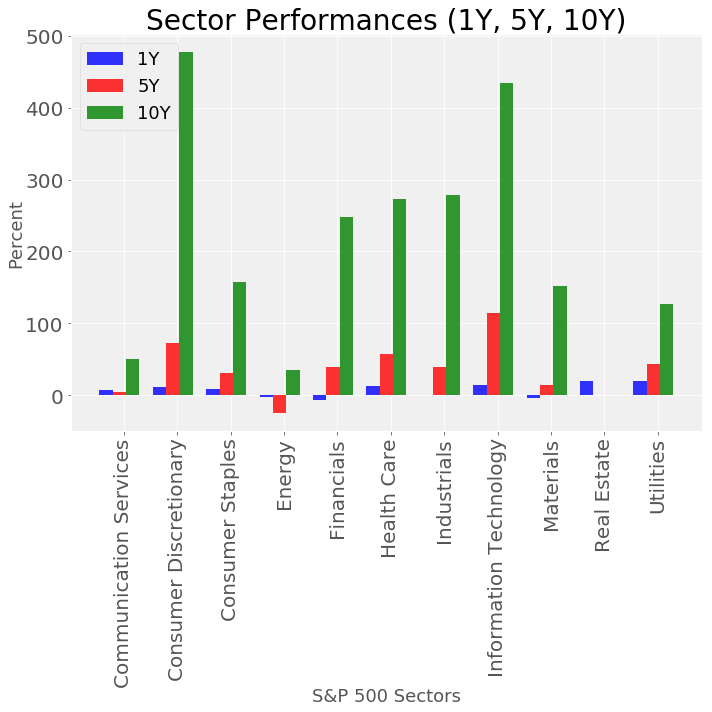

In [66]:
mpl.rcParams['figure.figsize'] = (10.0, 10) # Make plots bigger
fig, ax = plt.subplots()

xs = np.arange(len(dfav_sec.index))
bar_width = 0.25

rank1 = plt.bar(xs - bar_width, dfav_sec['1Y'], 
                width=bar_width,
                alpha=0.8,
                color='b',
                label='1Y')
rank2 = plt.bar(xs, dfav_sec['5Y'], 
                width=bar_width,
                alpha=0.8,
                color='r',
                label='5Y')
rank3 = plt.bar(xs + bar_width, dfav_sec['10Y'], 
                width=bar_width,
                alpha=0.8,
                color='g',
                label='10Y')
plt.xticks(xs + bar_width/3, dfav_sec.index)
plt.title('Sector Performances (1Y, 5Y, 10Y)', fontsize=28)
plt.legend(fontsize=18)

### rotates labels so they fit and aren't crowded
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90) 

ax.set_xlabel('S&P 500 Sectors', fontsize=18)
ax.set_ylabel('Percent', fontsize=18)
plt.tight_layout()

# WRDS API

To access the **WRDS** research platform you will need an account. If you don't have one, please make sure you get one by filling out this [form](https://wrds-web.wharton.upenn.edu/wrds/?register=1). 

First, we will be using the [WRDS-Py](https://pypi.org/project/wrds/) library to extract data from **WRDS** data sources. Below I will provide some examples of its usage. For more information see the [online documentation](https://wrds-www.wharton.upenn.edu/pages/support/programming-wrds/programming-python/python-from-your-computer/).

In [35]:
import wrds

### log-in sing your credentials
if 'conn' in locals():
    print("WRDS connection already open!")
else:
    conn = wrds.Connection()  
    conn.create_pgpass_file()

### We list the available WRDS libraries
conn.list_libraries()

Enter your WRDS username [chris.jauregui]:chrisjau
Enter your password:········
WRDS recommends setting up a .pgpass file.
You can find more info here:
https://www.postgresql.org/docs/9.5/static/libpq-pgpass.html.
Loading library list...
Done


['public',
 'wrds_lib_internal',
 'centris',
 'gsi',
 'rent',
 'wrdsapps',
 'wrdsapps_evtravtaq',
 'wrdsapps_finratios',
 'levin',
 'eureka',
 'ims',
 'ktmine',
 'secsamp_all_new',
 'ims_obp_trial',
 'compnad',
 'ifgr',
 'frb_all_new',
 'ginsight',
 'hfr',
 'macrofin_comm_trade',
 'macrofin',
 'clrvt',
 'taqm_2010',
 'taqm_2011',
 'taqm_2012',
 'taqm_2013',
 'taqm_2014',
 'infogroupsamp_business',
 'infogroupsamp_residential',
 'tr_mutualfunds',
 'compa',
 'comp_urq',
 'blab',
 'ftse',
 'tr_insiders',
 'lspd',
 'taqm_2015',
 'taqm_2016',
 'optionm',
 'contrib_char_returns',
 'trace_standard',
 'trace',
 'clrvtsmp',
 'contrib',
 'totalq',
 'trace_enhanced',
 'frb',
 'etfg',
 'compsnap',
 'audit_audit_comp',
 'tfn',
 'tr_13f',
 'comp_segments_hist',
 'comp_bank',
 'compm',
 'compb',
 'comp_global',
 'compg',
 'bvd_ama_small',
 'comph',
 'tr_ibes',
 'kld_histall',
 'kld',
 'msrb',
 'audit_corp_legal',
 'audit',
 'csmar',
 'ravenpack_trial',
 'ppubsamp_d4d',
 'ktmine_patents_samp',
 'etfg_

In [36]:
### Suppose we want to look at the WRDS Fama French & Liquidity Factors library, then we do the following:
conn.list_tables(library='ff')

['factors_daily',
 'factors_monthly',
 'liq_ps',
 'liq_sadka',
 'portfolios',
 'portfolios25',
 'portfolios_d']

In [37]:
### To describe the 'liq_ps' table we do the followin:
conn.describe_table(library='ff', table='liq_ps')

Approximately 0 rows in ff.liq_ps.


,name,nullable,type
0,yearmm,True,DOUBLE PRECISION
1,date,True,DATE
2,ps_level,True,DOUBLE PRECISION
3,ps_innov,True,DOUBLE PRECISION
4,ps_vwf,True,DOUBLE PRECISION


In [38]:
### To retrieve the first 20 observations of the 'liq_ps' table then we do the following:
dfff_liq_ps = conn.get_table(library='ff', table='liq_ps', obs=50)
dfff_liq_ps.head()

,yearmm,date,ps_level,ps_innov,ps_vwf
0,196208.0,1962-08-31,-0.018,0.004,-99.0
1,196209.0,1962-09-28,-0.004,0.012,-99.0
2,196210.0,1962-10-31,-0.104,-0.074,-99.0
3,196211.0,1962-11-30,-0.020,0.029,-99.0
4,196212.0,1962-12-31,-0.005,0.016,-99.0


For those that have experience with SQL, the `WRDS-Py` package also allows you to retrieve data using SQL commands:

In [39]:
### Pull the Pastor-Stambaugh liquidity factors using "raw_sql"
### ps_innov: Innovations in Aggregate Liquidity (non-traded factor)
### ps_level: Level of Aggregate Liquidity (non-traded factor)
### ps_vwf: Traded Liquidity Factor (traded factor -- value weighted
sql_query = """
SELECT date, 
       ps_level,
       ps_innov,
       ps_vwf
FROM ff.liq_ps
WHERE date >= '2010-01-01'
"""
dfff_liq_ps_v2 = conn.raw_sql(sql_query)
dfff_liq_ps_v2.head()

,date,ps_level,ps_innov,ps_vwf
0,2010-01-29,0.060,0.108,-1.257e-02
1,2010-02-26,0.018,0.034,9.810e-04
2,2010-03-31,0.016,0.027,-6.114e-02
3,2010-04-30,-0.046,-0.035,-6.075e-04
4,2010-05-28,-0.077,-0.023,-2.948e-02


In [40]:
### Close our connection (don't forget this!)
conn.close()

Now, we will try to figure out a way to load the **WRDS** username and password as environment variables. By doing this, we won't be promped every time we want to open a connection to the **WRDS** database. 

To do this, we have to manipulate a bit the `connect` attribute function of the `Connection` class integral to the `WRDS-Py` package. The construction of the `Connection` class is found [here](https://github.com/wharton/wrds/blob/master/wrds/sql.py). After writing a different version of the  `connect` attribute function, we can take advantage of SQL code and query any database using a raw SQL string. We do this by also rewriting the `raw_sql` attribute function for the `Connection` class. Code that implements this is found below. 

**Note:** We could also rewrite the entire `sql.py` script that defines the `Connection` class and all its attributes in order to make use of the automation of the connection process with environment variables. If you are ambitious, go for it!

In [41]:
import sys
import sqlalchemy as sa
from wrds import __version__ as wrds_version
from sys import version_info
from dotenv import load_dotenv # https://github.com/theskumar/python-dotenv

### Reloads the .env file in your home directory.
%reload_ext dotenv
%dotenv

### Rewritten version of the "connect" attribute function found in the WRDS-Py package
def wrds_direct_connection(wrds_usr, wrds_pwd):   
    ### Check which version of Pythin we are running. Handle differences accordingly.
    py3 = version_info[0] > 2 
    if not py3:
        input = raw_input  # use raw_input in python 2
        PermissionError = Exception
        FileNotFoundError = Exception

    appname = '{0} python {1}.{2}.{3}/wrds {4}'.format(
              sys.platform,
              version_info[0],
              version_info[1],
              version_info[2],
              wrds_version)

    ### Sane defaults
    wrds_hostname = 'wrds-pgdata.wharton.upenn.edu'
    wrds_port = 9737
    wrds_dbname = 'wrds'
    wrds_connect_args = {'sslmode': 'require', 'application_name': appname}
    try: 
        conn = engine.connect()
    except Exception as e:    
        pghost = 'postgresql://{usr}:{pwd}@{host}:{port}/{dbname}'
        engine = sa.create_engine(pghost.format(usr=wrds_usr,
                                                pwd=wrds_pwd,
                                                host=wrds_hostname,
                                                port=wrds_port,
                                                dbname=wrds_dbname),
                                                connect_args=wrds_connect_args)    
    try:
        conn = engine.connect()
        return conn
    except Exception as e:
        print("There was an error with your username and password.")
        raise e
 

 
### Rewritten version of the "raw_sql" attribute function found in the WRDS-Py package
def wrds_raw_sql(conn, sql, coerce_float=True, date_cols=None, index_col=None):
    try:
        return pd.read_sql_query(sql,conn,
                                    coerce_float=coerce_float,
                                    parse_dates=date_cols,
                                    index_col=index_col)
    except sa.exc.ProgrammingError as e:
        raise e     
         

In [42]:
### Use environment variables
wrds_conn = wrds_direct_connection(wrds_usr=os.getenv('WRDS_USERNAME'), 
                                   wrds_pwd=os.getenv('WRDS_PASSWORD'))

### Use the same sql query string from an earlier example
sql_query = """
SELECT date, 
       ps_level,
       ps_innov,
       ps_vwf
FROM ff.liq_ps
WHERE date >= '2010-01-01'
"""

dfff_liq_ps_v3 = wrds_raw_sql(wrds_conn, sql_query)
dfff_liq_ps_v3.head()

,date,ps_level,ps_innov,ps_vwf
0,2010-01-29,0.060,0.108,-1.257e-02
1,2010-02-26,0.018,0.034,9.810e-04
2,2010-03-31,0.016,0.027,-6.114e-02
3,2010-04-30,-0.046,-0.035,-6.075e-04
4,2010-05-28,-0.077,-0.023,-2.948e-02


# BEA API

To access economic data using the **BEA** API, you will need an account. If you don't have one, please make sure you get one by [registering here](https://apps.bea.gov/API/signup/index.cfm). I will provide two examples of how to access **BEA** data. First, I will use the `pyBEA` package. Then, I will directly make sure of the **BEA**'s API structure.

Regardless of the retrieval method, it is important to have detailed information on the **BEA** data you are looking for, similar to **FRED**. Locating the right information is made easy by accessing the [BEA API User Guide](https://apps.bea.gov/api/_pdf/bea_web_service_api_user_guide.pdf).

### Example 1:  Non-financial Corporate Profits (Domestic Industries)

In [43]:
import pybea

dfbea_corpprofits = pybea.get_data(os.environ['BEA_API_KEY'], DataSetName='NIPA',
                      TableName='T61600D',
                      Frequency=['A'],
                      Year=['ALL'],
                      ResultFormat="JSON"
                      )
print(dfbea_corpprofits.LineDescription.unique()) # get all unique instances of LineDescription

dfbea_corpprofits = dfbea_corpprofits.rename(columns={'TimePeriod': 'Date'})
dfbea_corpprofits['Date'] = dfbea_corpprofits['Date'].astype(int)
dfbea_corpprofits.set_index('Date', inplace=True, drop=True)

dfbea_corpprofits = dfbea_corpprofits[(dfbea_corpprofits['LineDescription']=='Nonfinancial')]
dfbea_corpprofits = dfbea_corpprofits[['DataValue']].div(1000) # Billions of USD
dfbea_corpprofits.head()

['Corporate profits with inventory valuation and capital consumption adjustments'
 'Domestic industries' 'Financial' 'Nonfinancial' 'Rest of the world'
 'Receipts from the rest of the world'
 'Less: Payments to the rest of the world'
 'Corporate profits with inventory valuation adjustment'
 'Federal Reserve banks' 'Other financial' 'Utilities' 'Manufacturing'
 'Durable goods' 'Fabricated metal products' 'Machinery'
 'Computer and electronic products'
 'Electrical equipment, appliances, and components'
 'Motor vehicles, bodies and trailers, and parts' 'Other durable goods'
 'Nondurable goods' 'Food and beverage and tobacco products'
 'Petroleum and coal products' 'Chemical products'
 'Other nondurable goods' 'Wholesale trade' 'Retail trade'
 'Transportation and warehousing' 'Information' 'Other nonfinancial']


,DataValue
Date,
1998,561.964
1999,550.717
2000,484.479
2001,385.824
2002,477.097


In [44]:
dfbea_corpprofits.tail()

,DataValue
Date,
2013,1336.342
2014,1378.117
2015,1346.912
2016,1253.297
2017,1218.854


### Example 2:  US Real GDP (percent change, annual rate)

In [45]:
dfbea_rgdp = pybea.get_data(os.environ['BEA_API_KEY'],
                      DataSetName='NIPA',
                      TableName='T10101',
                      Frequency=['A'],
                      Year='ALL',
                      ResultFormat="XML"
                      )
print(dfbea_rgdp.LineDescription.unique()) # get all unique instances of LineDescription

dfbea_rgdp = dfbea_rgdp.rename(columns={'TimePeriod': 'Date'})
dfbea_rgdp['Date'] = dfbea_rgdp['Date'].astype(int)
dfbea_rgdp = dfbea_rgdp[(dfbea_rgdp['LineDescription']=='Gross domestic product') &
                        (dfbea_rgdp['Date'] >= 1980)]
dfbea_rgdp.set_index('Date', inplace=True, drop=True)
dfbea_rgdp = dfbea_rgdp[['DataValue']] 
dfbea_rgdp.tail()

['Gross domestic product' 'Personal consumption expenditures' 'Goods'
 'Durable goods' 'Nondurable goods' 'Services'
 'Gross private domestic investment' 'Fixed investment' 'Nonresidential'
 'Structures' 'Equipment' 'Intellectual property products' 'Residential'
 'Exports' 'Imports'
 'Government consumption expenditures and gross investment' 'Federal'
 'National defense' 'Nondefense' 'State and local'
 'Gross domestic product, current dollars']


,DataValue
Date,
2014,2.5
2015,2.9
2016,1.6
2017,2.2
2018,2.9


## FRED API

## US Census Bureau

### Example: Business Dynamics Statistics (Time Series: 1976-2014) API

The [**Business Dynamics Statistics (BDS)**](https://www.census.gov/ces/dataproducts/bds/overview.html) provides measures of establishment openings and closings, firm startups, job creation and destruction by firm size, age, and industrial sector, and several other statistics on business dynamics.

**BDS** data is compiled from the **Longitudinal Business Database (LBD)**, which is a longitudinal database of business establishments and firms. An overview of the **BDS** can be found [here](https://www.census.gov/ces/dataproducts/bds/overview.html).

In the example below, I will query data on establishment entries/exits as well as firm exits, by industry and year. The **BDS** data accessible through its API is arranged by year. Thus, to create a "panel" of entry/exit data by industry and year, we need to loop through the annual datasets and create a dataframe by appending. 

In [46]:
import requests

### Reloads the .env file in your home directory.
%reload_ext dotenv
%dotenv

### years defining the panel
min_yr = 2000
max_yr = 2015

### Variables of interest: https://api.census.gov/data/timeseries/bds/firms/variables.html
# year: Year of survey
# sic1: Industry Sector
# estabs: Physical locations where business is conducted
# estabs_entry: Establishments born within the last 12 months
# estabs_entry_rate: Establishment entry rate
# estabs_exit: Establishments exited
# estabs_exit_rate: Establishment exit rate
# firmdeath_firms: Number of firm exits
# firms: Number of business organizations


### loop through years 
for yr in range(min_yr, max_yr + 1):     
    try:
        print('Year:', yr)
        params_fields = {"get": 'sic1,estabs_entry,estabs_entry_rate,estabs_exit,estabs_exit_rate,firms,firmdeath_firms',
                         "for": 'us:*', 
                         "year2": yr,
                         "key": os.getenv('USCENSUS_API_KEY')}

        url_base = 'https://api.census.gov/data/timeseries/bds/firms' # API call
        df_bds_yr = requests.get(url_base, params=params_fields).json() # use the built-in JSON decoder.    
        df_bds_yr = pd.DataFrame(df_bds_yr[1:], columns=df_bds_yr[0])
        if yr==min_yr:
            df_bds = df_bds_yr  
        else:
            df_bds = df_bds.append(df_bds_yr)
            del df_bds_yr
    except: 
        print('File for Year=', yr, ' does not exist!')
        pass
    
df_bds.rename(columns={'year2': 'YEAR'}, inplace=True)    
df_bds['YEAR'] = pd.PeriodIndex(df_bds['YEAR'], freq='Y')
df_bds = df_bds.drop("us", axis=1)

df_bds[['estabs_entry', 'estabs_entry_rate', 'estabs_exit', 'estabs_exit_rate', 'firms', 'firmdeath_firms']] = \
df_bds[['estabs_entry', 'estabs_entry_rate', 'estabs_exit', 'estabs_exit_rate', 'firms', 'firmdeath_firms']].apply(pd.to_numeric)

### Capitalize the column names   
df_bds.columns = [x.upper() for x in df_bds.columns]

### Create Multiindex (sic,year)
df_bds.set_index(['SIC1', 'YEAR'], inplace=True, drop=True)
df_bds.sort_values(['SIC1', 'YEAR'], axis=0, ascending=[1, 1], inplace=True)

Year: 2000
Year: 2001
Year: 2002
Year: 2003
Year: 2004
Year: 2005
Year: 2006
Year: 2007
Year: 2008
Year: 2009
Year: 2010
Year: 2011
Year: 2012
Year: 2013
Year: 2014
Year: 2015
File for Year= 2015  does not exist!


Let's now plot the time series of firm entry/exit rates for a few SIC1 industries. Specifically, let's take a look at Retail Trade (`SIC1=52`), Manufacturing (`SIC1=20`), as well as Finance, Insurance, and Real Estate (FIRE, `SIC=60`) from 2000 to 2014:

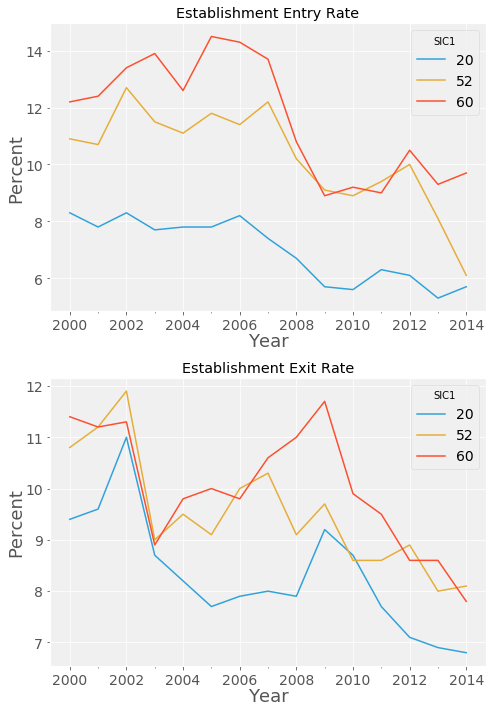

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 10))

df_plot = df_bds.loc[(df_bds.index.get_level_values('SIC1')=='52') | 
                     (df_bds.index.get_level_values('SIC1')=='20') |
                     (df_bds.index.get_level_values('SIC1')=='60')]

df_plot.reset_index().pivot('YEAR', 'SIC1', 'ESTABS_ENTRY_RATE').plot(ax=axes[0], title='Establishment Entry Rate', grid=True)
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[0].set_xlabel('Year', fontsize=18)
axes[0].set_ylabel('Percent', fontsize=18)

df_plot.reset_index().pivot('YEAR', 'SIC1', 'ESTABS_EXIT_RATE').plot(ax=axes[1], title='Establishment Exit Rate', grid=True)
axes[1].tick_params(axis='both', which='major', labelsize=14)
axes[1].set_xlabel('Year', fontsize=18)
axes[1].set_ylabel('Percent', fontsize=18)

plt.tight_layout()


# Intrinio API

**Intrinio**'s data feeds will be accessed directly using the **Intrinio** API (see [online documentation](https://docs.intrinio.com/tutorial/web_api)). Alternatively, you can use the Python package `intrinio-sdk`, which is a bit messy to work with (see [online documentation](https://github.com/intrinio/python-sdk)). This tutorial will not be using this package. 

The Sandbox API key will give you access to limited data from the [following feeds](https://docs.intrinio.com/documentation/api_v2/sandbox), while the Production key gives you complete data from the aforementioned feeds, but requires a subscription.

Below I will provide a few examples of how to access and query data directly using the **Intrinio** API.

### Example 1: Get the 100 Most Recent News Articles for Apple (APPL)

In [48]:
import requests
import time
import sys
from dotenv import load_dotenv # https://github.com/theskumar/python-dotenv

### Reloads the .env file in your home directory.
%reload_ext dotenv
%dotenv

### Based on Intrinio API Documentation for "All News by Company"
identifier = 'AAPL'
datafeed = '/news?'
api_key = os.getenv('INTRINIO_SANDBOX_API_KEY')
url = 'https://api-v2.intrinio.com/companies/' + identifier + datafeed + 'api_key=' + api_key

data = requests.get(url).json() # use the built-in JSON decoder.
dict_AAPL_info = data['company']  # extract dictionary with company information
dfin_AAPL_news = pd.DataFrame(data['news'])  # create dataframe with actual news information
dfin_AAPL_news['publication_date'] = [s.replace('T', ' ').replace('Z', '') for s in dfin_AAPL_news['publication_date']]
dfin_AAPL_news['publication_date'] = pd.to_datetime(dfin_AAPL_news['publication_date'])
dfin_AAPL_news.head()

,id,publication_date,summary,title,url
0,nws_6G8pLP,2019-03-25 03:51:13,"Stock futures reversed lower, signaling more s...",Dow Jones Futures Reverse Lower; Apple Streami...,https://finance.yahoo.com/m/4b5d7ce4-16e8-3733...
1,nws_dKmOWq,2019-03-25 00:30:13,Stock futures signaled no rebound after Robert...,Dow Jones Futures Signal No Rebound; Apple Str...,https://finance.yahoo.com/m/4b5d7ce4-16e8-3733...
2,nws_rJNnqo,2019-03-25 00:18:00,Apple Inc. will shift its business further tow...,"Apple set to unveil streaming service, will re...",https://finance.yahoo.com/m/ce227b6f-fd9d-35e0...
3,nws_JbNx6m,2019-03-24 23:48:13,Stock futures signaled a tepid rebound after R...,Dow Jones Futures Signal Tepid Rebound; Apple ...,https://finance.yahoo.com/m/4b5d7ce4-16e8-3733...
4,nws_eomb2J,2019-03-24 22:45:13,Stock futures signaled a tepid rebound after R...,Dow Jones Futures Rise On Mueller; Apple Strea...,https://finance.yahoo.com/m/4b5d7ce4-16e8-3733...


In [49]:
dfin_AAPL_news.tail()

,id,publication_date,summary,title,url
95,nws_PQLMKP,2019-03-22 14:09:05,It s long been rumored that Apple NASDAQ AAPL ...,Showtime for Apple: What to Expect From Monday...,http://articlefeeds.nasdaq.com/~r/nasdaq/symbo...
96,nws_25N69Z,2019-03-22 14:09:05,It s long been rumored that Apple NASDAQ AAPL ...,Showtime for Apple: What to Expect From Monday...,http://articlefeeds.nasdaq.com/~r/nasdaq/symbo...
97,nws_dKmNBJ,2019-03-22 14:07:02,A rally in shares of Apple buoyed gains for th...,"Stock Market News For Mar 22, 2019",https://finance.yahoo.com/news/stock-market-ne...
98,nws_ZYqdOP,2019-03-22 13:55:01,"The Zacks Analyst Blog Highlights: Apple, Inte...","The Zacks Analyst Blog Highlights: Apple, Inte...",https://finance.yahoo.com/news/zacks-analyst-b...
99,nws_595dW4,2019-03-22 13:51:36,"The stock market rallied as Apple, Amazon and ...","Current Stock Market Rallies On Apple, Amazon;...",https://finance.yahoo.com/m/d7238192-3659-3962...


### Example 2: Get the 100 Most Recent SEC Filings Information for Apple (APPL)

In [50]:
import requests
import time
import sys
from dotenv import load_dotenv # https://github.com/theskumar/python-dotenv

### Reloads the .env file in your home directory.
%reload_ext dotenv
%dotenv

### Based on Intrinio API Documentation for "All Filings by Company"
identifier = 'AAPL'
datafeed = '/filings?'
api_key = os.getenv('INTRINIO_SANDBOX_API_KEY')
url = 'https://api-v2.intrinio.com/companies/' + identifier + datafeed + 'api_key=' + api_key

data = requests.get(url).json() # use the built-in JSON decoder.

dict_AAPL_filingsinfo = data['company']  # extract dictionary with company information
dfin_AAPL_filings = pd.DataFrame(data['filings'])  # create dataframe with actual filings information
dfin_AAPL_filings['accepted_date'] = [s.replace('T', ' ').replace('Z', '') for s in dfin_AAPL_filings['accepted_date']]
dfin_AAPL_filings['accepted_date'] = pd.to_datetime(dfin_AAPL_filings['accepted_date'])
dfin_AAPL_filings['filing_date'] = pd.to_datetime(dfin_AAPL_filings['filing_date'])
dfin_AAPL_filings['period_end_date'] = pd.to_datetime(dfin_AAPL_filings['period_end_date'])
dfin_AAPL_filings = dfin_AAPL_filings[['accepted_date', 'filing_date', 
                                       'period_end_date', 'report_type',
                                       'id', 'instance_url', 'report_url', 'sec_unique_id']]

dfin_AAPL_filings.head()

,accepted_date,filing_date,period_end_date,report_type,id,instance_url,report_url,sec_unique_id
0,2019-03-14 16:37:02,2019-03-14,NaT,8-A12B,fil_rJ4Kjk,None,https://www.sec.gov/Archives/edgar/data/320193...,0001193125-19-074868
1,2019-03-14 16:39:32,2019-03-14,2019-03-14,25,fil_eoqK1E,None,https://www.sec.gov/Archives/edgar/data/320193...,0001193125-19-074874
2,2019-03-14 16:46:44,2019-03-14,2019-03-14,CERT,fil_7KEQRl,None,https://www.sec.gov/Archives/edgar/data/320193...,0001354457-19-000130
3,2019-03-05 18:29:19,2019-03-05,2019-03-01,4,fil_ZYLo5G,None,https://www.sec.gov/Archives/edgar/data/320193...,0000320193-19-000040
4,2019-03-05 18:30:32,2019-03-05,2019-03-01,4,fil_88oGbl,None,https://www.sec.gov/Archives/edgar/data/320193...,0000320193-19-000041


In [51]:
dfin_AAPL_filings.tail()

,accepted_date,filing_date,period_end_date,report_type,id,instance_url,report_url,sec_unique_id
95,2018-02-15 18:36:24,2018-02-15,2018-02-13,4,fil_bWRnBN,None,https://www.sec.gov/Archives/edgar/data/320193...,0000320193-18-000037
96,2018-02-14 16:54:21,2018-02-14,2018-02-13,8-K,fil_59x9x0,None,https://www.sec.gov/Archives/edgar/data/320193...,0001193125-18-045761
97,2018-02-12 09:44:18,2018-02-12,NaT,SC 13G/A,fil_3rRx0x,None,https://www.sec.gov/Archives/edgar/data/102909...,0000932471-18-004625
98,2018-02-08 18:30:44,2018-02-08,2018-02-06,4,fil_03Kprm,None,https://www.sec.gov/Archives/edgar/data/320193...,0000320193-18-000023
99,2018-02-05 18:30:53,2018-02-05,2018-02-01,4,fil_kpZ9ok,None,https://www.sec.gov/Archives/edgar/data/320193...,0000320193-18-000015


# Xignite API

Access to all of **Xignites**'s data feeds requires a subscription. However, you may obtain a 7-day trial to one of its data feeds. Below I provide an example of how to pull data from its *XigniteGlobalFundFundamentals* dataset, using the API structure specific to this feed. Specifically, I pull identifiers for all the funds for which data is supported by **Xignite**.

This API offers a wide collection of fundamental data for 8+ fund types from over 70 countries spanning across the Africa, Asia-Pacific, Australia-New Zealand, Caribbean, Europe, UK, Latin America, Middle East, Canada, and US regions. This data is provided by Morningstar.

In [52]:
import os
import sys
from dotenv import load_dotenv # https://github.com/theskumar/python-dotenv

### Reloads the .env file in your home directory.
%reload_ext dotenv
%dotenv

### This returns identifiers for all the funds for which data is supported by this service. 
### You can query funds by alphabetical range.
url_base = 'https://globalfundfundamentals.xignite.com/'
feed = 'xGlobalFundFundamentals.json/ListFundsByCountry?'
countrycode = 'US'
fund_type = 'OpenEndFund'
start_name = 'A'
end_name = 'Z'
url = url_base + feed + 'CountryCode=' + countrycode + '&FundTypes=' + fund_type + '&StartName=' + start_name + '&EndName=' + end_name + '&_token=' + os.getenv('XIGNITE_API_KEY') 


data = requests.get(url).json() # use the built-in JSON decoder.
dfxig_funds = pd.DataFrame(data['FundDescriptions'])
dfxig_funds.head()

,CIK,CUSIP,CountryOfDomicile,CountryOfDomicileCode,CountryOfSales,CountryOfSalesCode,Currency,ExchangeDescriptions,ISIN,MorningstarID,Name,SEDOL,Type,Valoren
0,0000705318,None,United States,US,United States,US,USD,"[{'MarketIdentificationCode': 'XNAS', 'Market'...",None,F00000XKG7,AAAMCO Ultrashort Financing I,None,OpenEndFund,
1,0000705318,None,United States,US,United States,US,USD,"[{'MarketIdentificationCode': 'XNAS', 'Market'...",None,F00000XKG8,AAAMCO Ultrashort Financing Y,None,OpenEndFund,
2,0001318342,None,United States,US,United States,US,USD,"[{'MarketIdentificationCode': 'XNAS', 'Market'...",None,F00000OEUB,AAM/Bahl & Gaynor Income Growth A,None,OpenEndFund,
3,0001318342,None,United States,US,United States,US,USD,"[{'MarketIdentificationCode': 'XNAS', 'Market'...",None,F00000OEUC,AAM/Bahl & Gaynor Income Growth C,None,OpenEndFund,
4,0001318342,None,United States,US,United States,US,USD,"[{'MarketIdentificationCode': 'XNAS', 'Market'...",None,F00000OEUA,AAM/Bahl & Gaynor Income Growth I,None,OpenEndFund,


In [53]:
dfxig_funds.tail()

,CIK,CUSIP,CountryOfDomicile,CountryOfDomicileCode,CountryOfSales,CountryOfSalesCode,Currency,ExchangeDescriptions,ISIN,MorningstarID,Name,SEDOL,Type,Valoren
26360,0000764859,None,United States,US,United States,US,USD,"[{'MarketIdentificationCode': 'XNAS', 'Market'...",None,F00000PRU2,Yorktown Short Term Bond Institutional,None,OpenEndFund,
26361,0000764859,None,United States,US,United States,US,USD,"[{'MarketIdentificationCode': 'XNAS', 'Market'...",None,FOUSA05ILK,Yorktown Short Term Bond L,None,OpenEndFund,2665396
26362,0000764859,None,United States,US,United States,US,USD,"[{'MarketIdentificationCode': 'XNAS', 'Market'...",None,F00000WWLY,Yorktown Small-Cap A,None,OpenEndFund,
26363,0000764859,None,United States,US,United States,US,USD,"[{'MarketIdentificationCode': 'XNAS', 'Market'...",None,F00000WWM1,Yorktown Small-Cap Institutional,None,OpenEndFund,
26364,0000764859,None,United States,US,United States,US,USD,"[{'MarketIdentificationCode': 'XNAS', 'Market'...",None,F00000WWM0,Yorktown Small-Cap L,None,OpenEndFund,


### If you would like to contribute to this tutorial and add additional APIs, send me an email! 😎